In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re , collections , string , time , random
import nltk
import spacy


plt.style.use('dark_background')
mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=['blue'])

In [2]:
df = pd.read_csv('./data/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
print(f"{df.info()=}\n{df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## Data Cleaning and Understanding:


### Q1.(5marks)Summarizethedataset:

- Number of unique users, products, and reviews.
- Top 5 categories by number of products
- Price range and discount insights


In [4]:
print(f"# of unique users: {len(np.unique(df['user_id']))}")

# of unique users: 1194


In [5]:
print("Top 5 categories by number of products:")
df.groupby('category').agg({"product_id" : "count"}).sort_values('product_id' , ascending=False).rename(columns={"product_id" : '# of products'}).head()

Top 5 categories by number of products:


,# of products
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52


In [6]:
#actual and discounted price range:
#process the columns to get the prices as integers:
translateTable = str.maketrans('' , '' , string.punctuation)
def formatPrice(price):
    price = price[1:]
    price = str.translate(price , translateTable)
    return int(price)
df['fprice'] = df['actual_price'].apply(formatPrice)
df['fdprice'] = df['discounted_price'].apply(formatPrice)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,fprice,fdprice
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,1099,399
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,349,199
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,1899,199
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,699,329
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,399,154


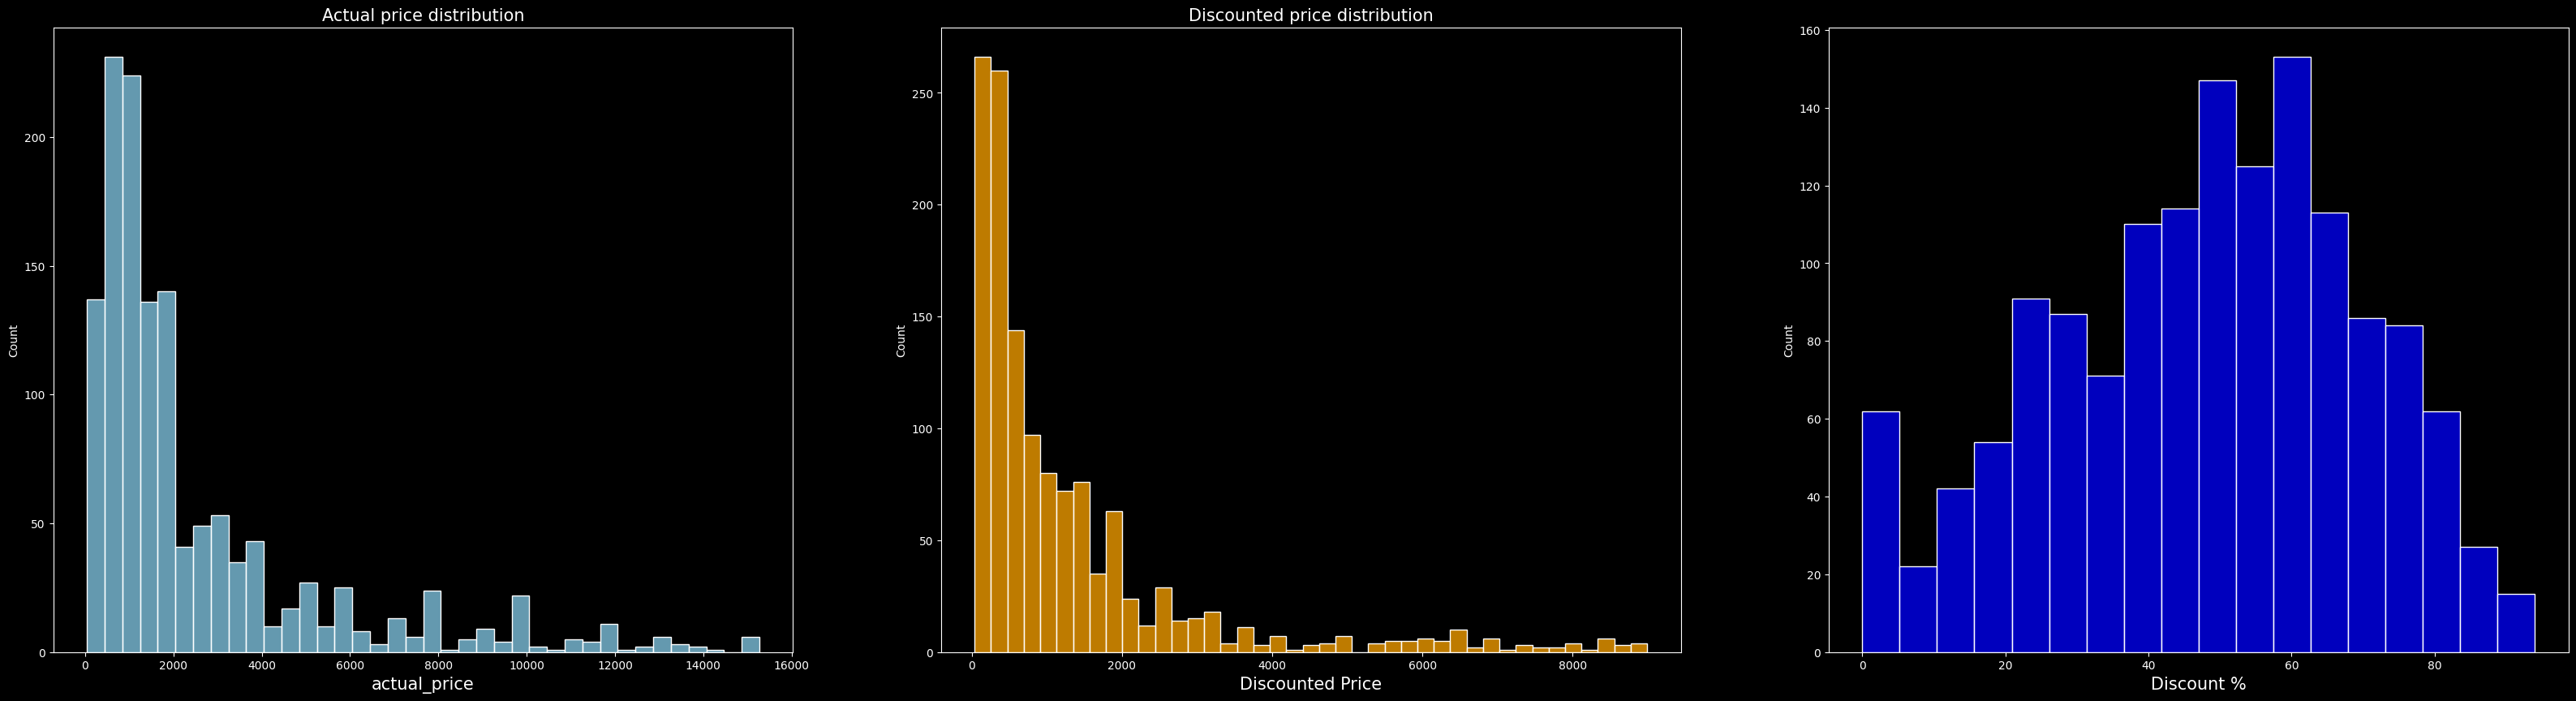

Actual price min/max: (39 , 433296)
Discounted price min/max: (39 , 365766)


In [7]:
p99 = np.percentile(df['fprice'] , 90)
dp99 = np.percentile(df['fdprice'], 90)

df['dpercent'] = df['discount_percentage'].apply(lambda x : int(x[:-1]))


plt.figure(figsize=(40 , 10))

plt.subplot(1 , 3, 1)
sns.histplot(df[df['fprice'] < p99]['fprice'] , color = 'skyblue')
plt.title('Actual price distribution' , fontsize = 15)
plt.xlabel('actual_price' , fontsize = 15)

plt.subplot(1, 3, 2)
sns.histplot(df[df['fdprice'] < dp99]['fdprice'] , color = 'orange')
plt.xlabel('Discounted Price' , fontsize = 15)
plt.title('Discounted price distribution' , fontsize = 15)

plt.subplot(1 , 3, 3)
sns.histplot(df['dpercent'])
plt.xlabel('Discount %' , fontsize = 15)
plt.show()
print(f"Actual price min/max: ({df['fprice'].min()} , {df['fprice'].max()})")
print(f"Discounted price min/max: ({df['fdprice'].min()} , {df['fdprice'].max()})")

📉 1. Most Products Are Heavily Discounted (40–70%)

- The third plot (Discount %) shows a peak between 40% and 70%, with a roughly bell-shaped distribution.

- This indicates that most products are sold with moderate to high discounts.

- Very high discounts (80–90%) and very low (0–10%) are rare.

💰 2. Discounts Applied Even on Higher-Priced Items

- In the first plot (Actual Price), although there are some high-price items (> ₹5000), the majority of items fall under ₹3000.

- The second plot (Discounted Price) also shows a concentration below ₹2000, which indicates that discounting significantly reduces the price range, especially for mid-to-high-value products.

- This suggests discounts are effective across price brackets, not just on budget items.

⚠️ 3. Discounting Smoothens the Price Distribution

- Compared to the actual price (left skewed), the discounted price histogram is less sharply skewed.

- This implies that discounting helps compress the pricing towards the median/lower segments, which could be a strategy to attract more value-sensitive buyers.

📦 4. Price Ranges Affected Most by Discounts

- A large number of products originally priced under ₹1500–₹2000 are pushed below ₹1000 after discounts (as seen from the density shift from Actual to Discounted).

- This makes previously mid-range items accessible to lower-budget customers, expanding the addressable market.


### Clean and preprocess the data:

- Convert prices to numeric -> Converted in previous step.
- Parse categories into hierarchy levels
- Normalize rating scores and count outliers or Create derived features like price_difference ,value_for_money_score ,weighted ratings.


In [8]:
#parse categories into hierarchy levels:
def parseCategories(row):
    categories = row['category'].split("|")
    for i , category in enumerate(categories):
        row["cl"+str(i+1)] = category
    return row

df = df.apply(parseCategories , axis = 1)
df.head()

,about_product,actual_price,category,cl1,cl2,cl3,cl4,cl5,cl6,cl7,...,product_id,product_link,product_name,rating,rating_count,review_content,review_id,review_title,user_id,user_name
0,High Compatibility : Compatible With iPhone 12...,"₹1,099",Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN,...,B07JW9H4J1,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,"24,269",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,"Compatible with all Type C enabled devices, be...",₹349,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN,...,B098NS6PVG,https://www.amazon.in/Ambrane-Unbreakable-Char...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,"43,994",I ordered this cable to connect my phone to An...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,【 Fast Charger& Data Sync】-With built-in safet...,"₹1,899",Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN,...,B096MSW6CT,https://www.amazon.in/Sounce-iPhone-Charging-C...,Sounce Fast Phone Charging Cable & Data Sync U...,3.9,"7,928","Not quite durable and sturdy,https://m.media-a...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,The boAt Deuce USB 300 2 in 1 cable is compati...,₹699,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN,...,B08HDJ86NZ,https://www.amazon.in/Deuce-300-Resistant-Tang...,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,4.2,"94,363","Good product,long wire,Charges good,Nice,I bou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,[CHARGE & SYNC FUNCTION]- This cable comes wit...,₹399,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN,...,B08CF3B7N1,https://www.amazon.in/Portronics-Konnect-POR-1...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,4.2,"16,905","Bought this instead of original apple, does th...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."


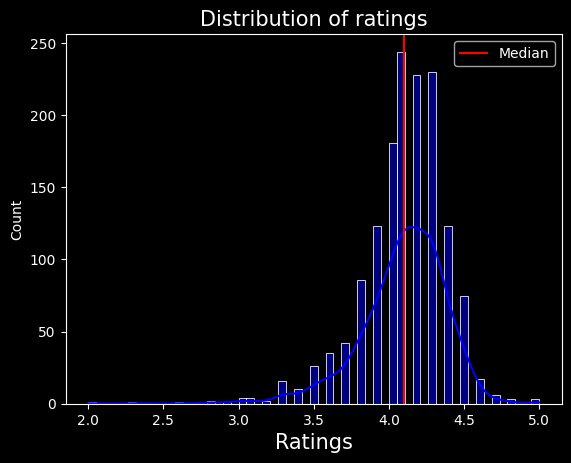

Since the distribution is -vely skewed, invalis values are replaced with the median value.


In [9]:
#visualize ratings:
sns.histplot(pd.to_numeric(df['rating'] , errors = 'coerce').dropna() , kde = True)
plt.axvline(pd.to_numeric(df['rating'] , errors = 'coerce').median() , color = 'red' , label = 'Median')
plt.legend()
plt.title('Distribution of ratings' , fontsize = 15)
plt.xlabel("Ratings" , fontsize = 15)
plt.show()
print(f"Since the distribution is -vely skewed, invalis values are replaced with the median value.")

In [10]:
#preprocess ratings
#handle invalid values:
ratings = df['rating']
ratings = pd.to_numeric(ratings , errors = 'coerce')
print(f"# of invalid ratings: {ratings.isna().sum()}")
#fill the na value with median value:
ratings = ratings.fillna(ratings.median())
df['rating'] = ratings
df['rating'].info()

# of invalid ratings: 1
<class 'pandas.core.series.Series'>
RangeIndex: 1465 entries, 0 to 1464
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1465 non-null   float64
dtypes: float64(1)
memory usage: 11.6 KB


In [11]:
#normalize rating
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_norm'] = (df['rating'] - df['rating'].min())/(df['rating'].max() - df['rating'].min())
df['rating_norm'].min() , df['rating'].max()
q1 = df['rating'].quantile(0.25)
q3 = np.quantile(df['rating'] , 0.75)
iqr = q3 - q1

print(f"q1:{q1} , q3:{q3} , iqr:{iqr}")
lowerb = q1 - 1.5 * iqr
upperb = q3 + 1.5 * iqr
print(f"lower bound: {lowerb} , upper bound: {upperb}")

qoutliers = df[(df['rating'] < lowerb)|( df['rating'] > upperb)].shape[0]
print(f"# of outliers using quantiles: {qoutliers}")

q1:4.0 , q3:4.3 , iqr:0.2999999999999998
lower bound: 3.5500000000000003 , upper bound: 4.75
# of outliers using quantiles: 74


In [12]:
#computer derived features:

df['pricediff'] = df['fprice'] - df['fdprice']

#normalize price to computer value for money products:
df['price_norm'] = (df['fprice'] - df['fprice'].min())/(df['fprice'].max() - df['fprice'].min())
df.head()

,about_product,actual_price,category,cl1,cl2,cl3,cl4,cl5,cl6,cl7,...,rating,rating_count,review_content,review_id,review_title,user_id,user_name,rating_norm,pricediff,price_norm
0,High Compatibility : Compatible With iPhone 12...,"₹1,099",Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN,...,4.2,"24,269",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",0.733333,700,0.002447
1,"Compatible with all Type C enabled devices, be...",₹349,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN,...,4.0,"43,994",I ordered this cable to connect my phone to An...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",0.666667,150,0.000716
2,【 Fast Charger& Data Sync】-With built-in safet...,"₹1,899",Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN,...,3.9,"7,928","Not quite durable and sturdy,https://m.media-a...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...",0.633333,1700,0.004293
3,The boAt Deuce USB 300 2 in 1 cable is compati...,₹699,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN,...,4.2,"94,363","Good product,long wire,Charges good,Nice,I bou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",0.733333,370,0.001523
4,[CHARGE & SYNC FUNCTION]- This cable comes wit...,₹399,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN,...,4.2,"16,905","Bought this instead of original apple, does th...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",0.733333,245,0.000831


In [13]:
#computer value for money score:
df['value_for_money'] = 0.7 * (1 - df['price_norm']) + 0.3 * df['rating_norm']
# get top 5 most value for money products:
df.sort_values(by = "value_for_money" , ascending= False)[['product_name' , 'value_for_money']].iloc[:5]

,product_name,value_for_money
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",0.998449
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,0.998447
174,Syncwire LTG to USB Cable for Fast Charging Co...,0.996833
1201,"Oratech Coffee Frother electric, milk frother ...",0.979257
1145,Swiffer Instant Electric Water Heater Faucet T...,0.976833


### Handle missing values or anomalies:

- Remove duplicates , invalid records
- Handle missing ratings/reviews with appropriate strategy


fprice     0
fdprice    0
dtype: int64
Missing values in rating_count: 2
df.shape=(1465, 31)
Missing values in reviews: 0 , 0


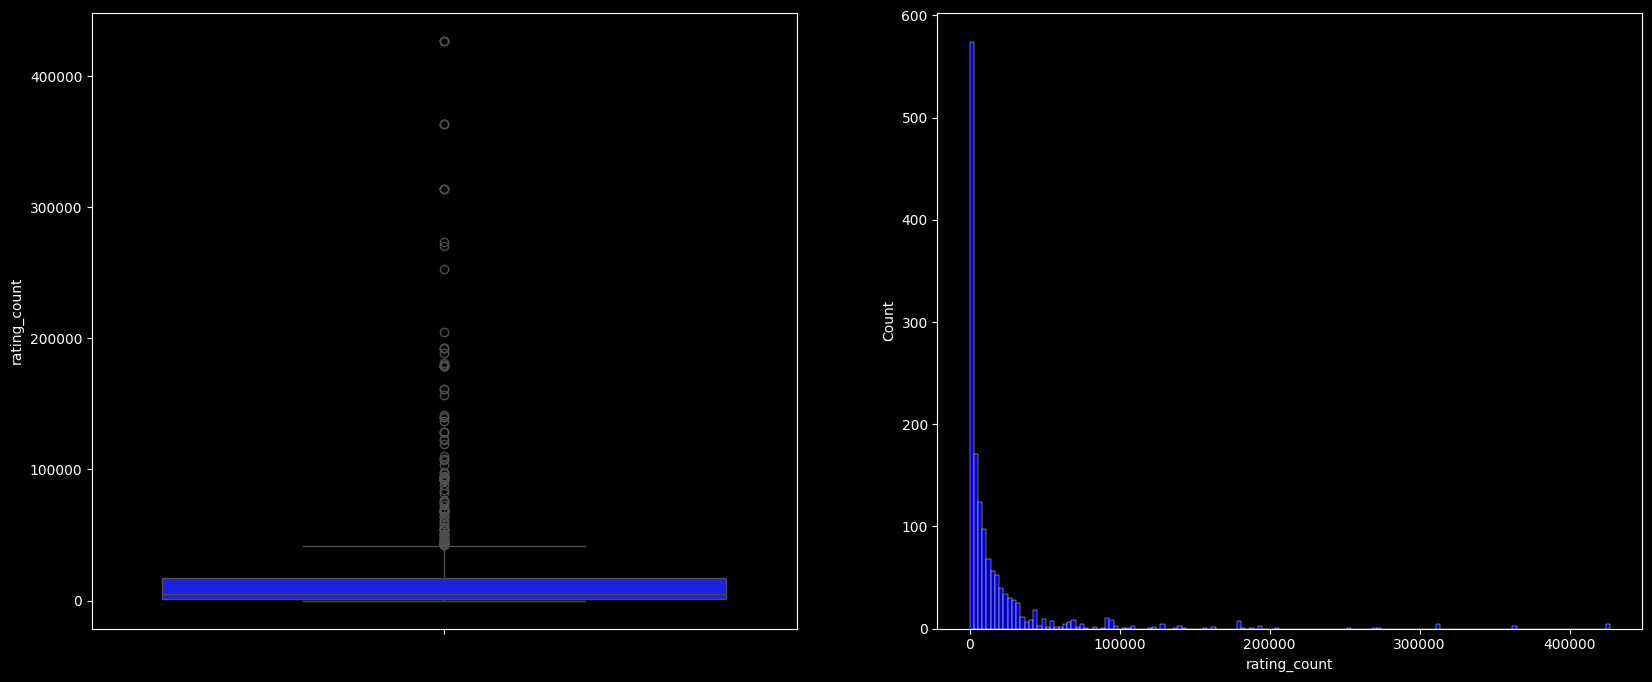

In [14]:
#drop duplicate rows
df.drop_duplicates(inplace = True)

#column wise drops:

df.drop_duplicates(subset=df.columns , keep = 'first' , inplace = True)
print(f"{df[['fprice' , 'fdprice']].isna().sum()}")

# handle missing review counts -> assign zero.

ratingcounts = pd.to_numeric(df['rating_count'].str.replace(',' , '') , errors = 'coerce')

#missing values in rating_count:
print(f'Missing values in rating_count: {ratingcounts.isna().sum()}')

# distribution of rating_count to decide how to fill the missing values mean/median according to normal/skewed:

plt.figure(figsize = (20 , 8))
plt.subplot(1 , 2 , 1)
sns.boxplot(ratingcounts)

plt.subplot(1 , 2 , 2)
sns.histplot(ratingcounts)

df['frating_count'] = ratingcounts.fillna(ratingcounts.median())

print(f"{df.shape=}")
# missing values for rating are handled in previous step.
# analysis of missing values in reviews:
revs = df['review_content']
print(f"Missing values in reviews: {revs.isna().sum()} , {(revs.str.len() == 0).sum()}")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   about_product        1465 non-null   object 
 1   actual_price         1465 non-null   object 
 2   category             1465 non-null   object 
 3   cl1                  1465 non-null   object 
 4   cl2                  1465 non-null   object 
 5   cl3                  1457 non-null   object 
 6   cl4                  1300 non-null   object 
 7   cl5                  522 non-null    object 
 8   cl6                  85 non-null     object 
 9   cl7                  13 non-null     object 
 10  discount_percentage  1465 non-null   object 
 11  discounted_price     1465 non-null   object 
 12  dpercent             1465 non-null   int64  
 13  fdprice              1465 non-null   int64  
 14  fprice               1465 non-null   int64  
 15  img_link             1465 non-null   o

## ExploratoryDataAnalysis


### Visualize:

- Most reviewed products
- Visualize top 10 categories by number of products.
- Average rating per category
- Discounts vs actual price correlation
- User Engagement Insights
  - Which products have high ratings but low review counts ?
  - Are highly rated products also heavily reviewed?


(1465,) , 1351


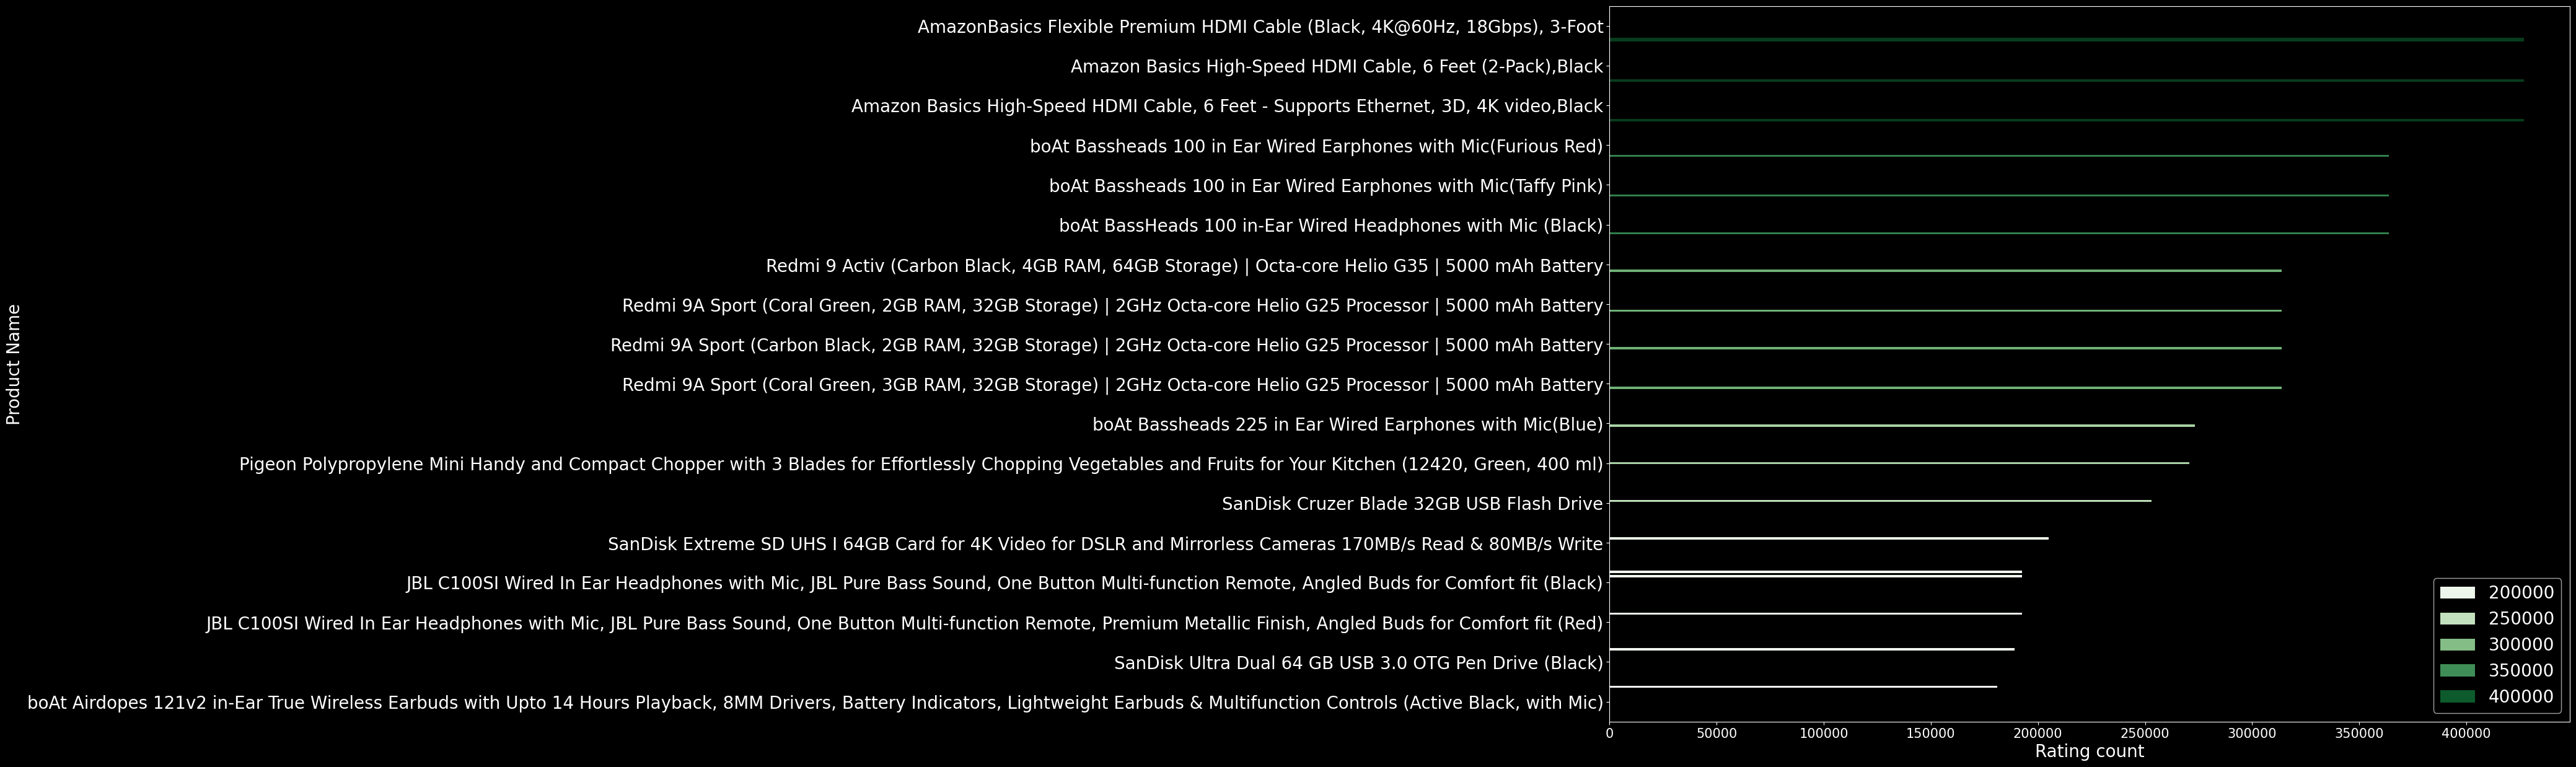

In [16]:
#top 20 most reviewed products
print(f"{df.product_id.shape} , {df.product_id.nunique()}")
temp = df.sort_values('frating_count' , ascending = False)[['product_name' , 'frating_count']].iloc[:20]
plt.figure(figsize=(20 , 15))
sns.barplot(temp , x = 'frating_count' , y = 'product_name' , hue = 'frating_count' , palette='Greens')
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.xticks(fontsize = 15)
plt.xlabel("Rating count" , fontsize = 20)
plt.ylabel("Product Name" , fontsize = 20)
plt.show()

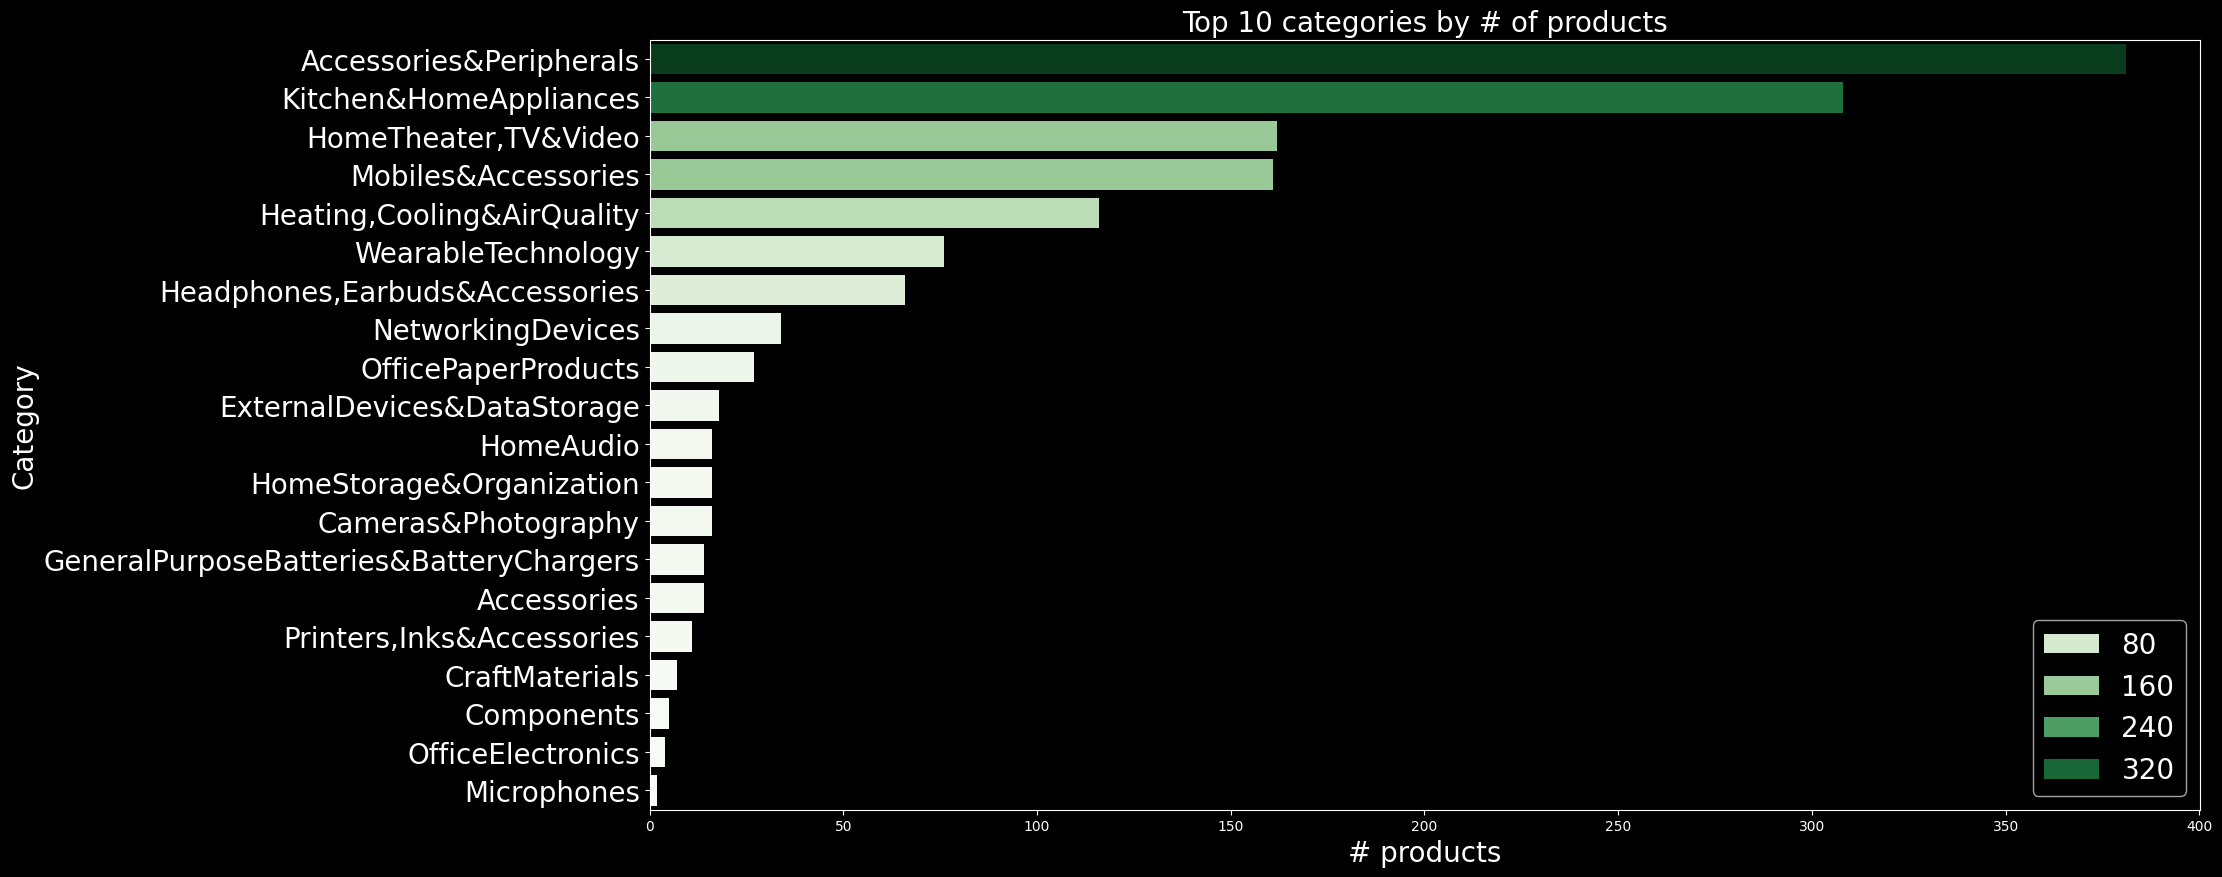

In [17]:
# top 10 categories by number of products
temp = df.groupby([ 'cl2']).agg({"product_id":'count'}).reset_index().rename(columns = {"cl2":'category' , "product_id":'products'}).sort_values('products' , ascending = False).iloc[:20]
plt.figure(figsize = (20 , 10))
sns.barplot(temp , x = 'products' , y = 'category' , hue = 'products' , palette = 'Greens')
plt.title('Top 10 categories by # of products' , fontsize = 20)
plt.xlabel('# products' , fontsize = 20)
plt.ylabel("Category", fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_49663/2237187595.py:2: FutureWarning: The provided callable <function mean at 0x107207240> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp = df.groupby('cl2').agg({"rating" : np.mean}).reset_index().rename(columns = {"cl2":"category" , "rating":"avgRating"}).sort_values('avgRating')


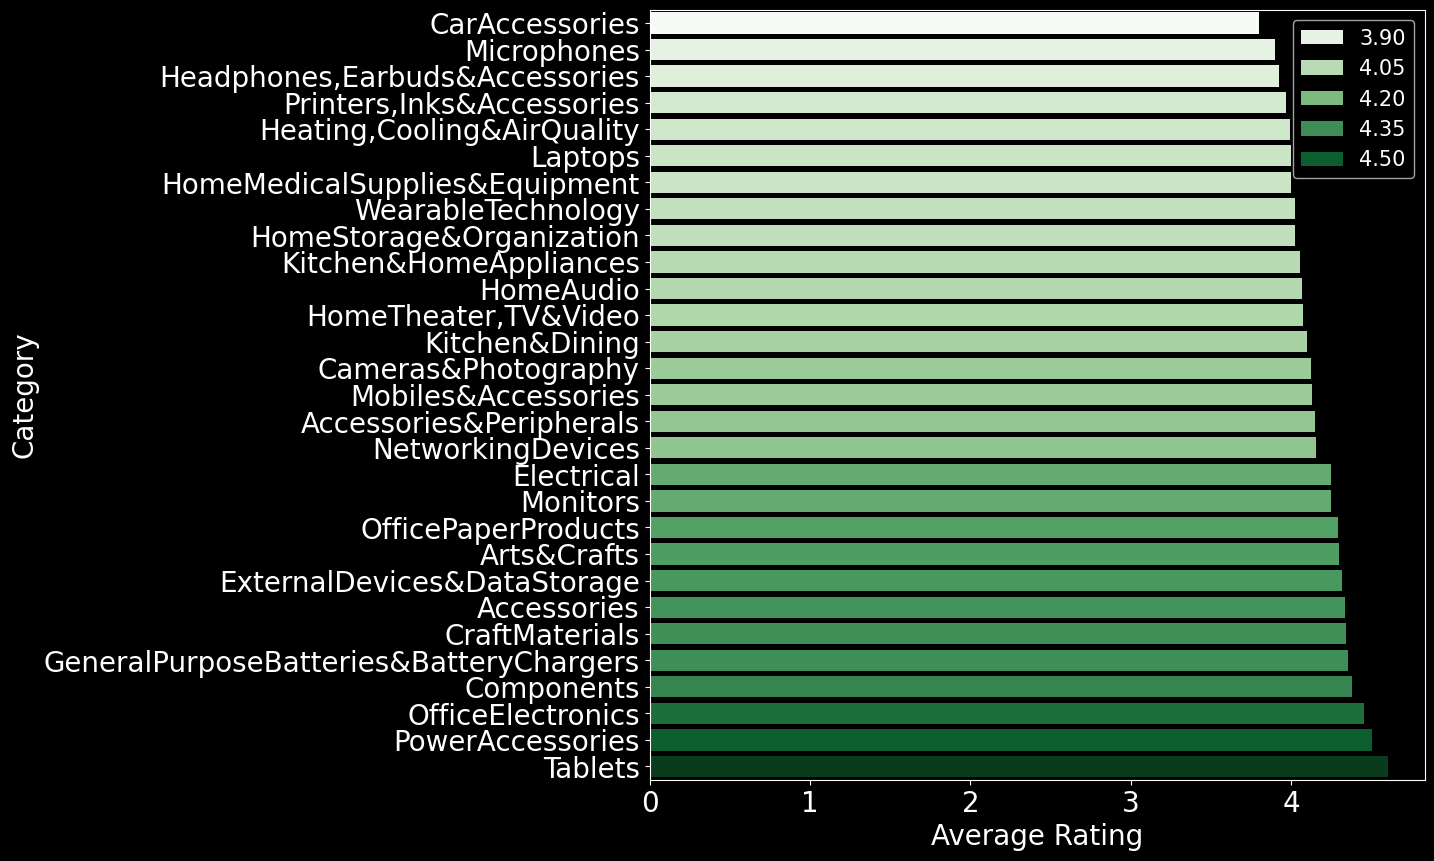

In [18]:
# average rating per category:
temp = df.groupby('cl2').agg({"rating" : np.mean}).reset_index().rename(columns = {"cl2":"category" , "rating":"avgRating"}).sort_values('avgRating')
plt.figure(figsize = (10, 10))
sns.barplot(temp , x = 'avgRating' , y = 'category' , hue = 'avgRating' , palette = 'Greens')
plt.xlabel("Average Rating" , fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel("Category" , fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [19]:
#discount vs actual price correlation:
from scipy.stats import pearsonr
print(f"Pearson correlation b/w acutal and discounted price: {df['fprice'].corr(df['fdprice'])}")


Pearson correlation b/w acutal and discounted price: 0.23880937369659444


In [20]:
### which products have hight ratings but low review counts:
ratings = df['rating']
thresholdRatings = np.percentile(ratings , 75)

ratingsc = df['frating_count']
thresholdRatingCount = np.percentile(ratingsc , 25)
tdf = df[(df['rating'] > thresholdRatings) & (df['frating_count'] < thresholdRatingCount)]
print("Products with high ratings but low review_counts: ")
tdf['product_name'].unique()

Products with high ratings but low review_counts: 


array(['Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black',
       'Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black',
       'oraimo 65W Type C to C Fast Charging Cable USB C to USB C Cable High Speed Syncing, Nylon Braided 1M length with LED Indicator Compatible For Laptop, Macbook, Samsung Galaxy S22 S20 S10 S20Fe S21 S21 Ultra A70 A51 A71 A50S M31 M51 M31S M53 5G',
       'Lapster 65W compatible for OnePlus Dash Warp Charge Cable , type c to c cable fast charging Data Sync Cable Compatible with One Plus 10R / 9RT/ 9 pro/ 9R/ 8T/ 9/ Nord & for All Type C Devices – Red, 1 Meter',
       'Cotbolt Silicone Protective Case Cover for LG an MR21GA Magic Remote Shockproof for LG Smart TV Remote 2021 Protective Skin Waterproof Anti Lost (Black) (Remote Not Included)',
       'Be

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_49663/4189803035.py:3: FutureWarning: The provided callable <function sum at 0x107206160> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tdf = tdf.groupby('product_name').agg({"frating_count":np.sum}).reset_index().sort_values('frating_count')


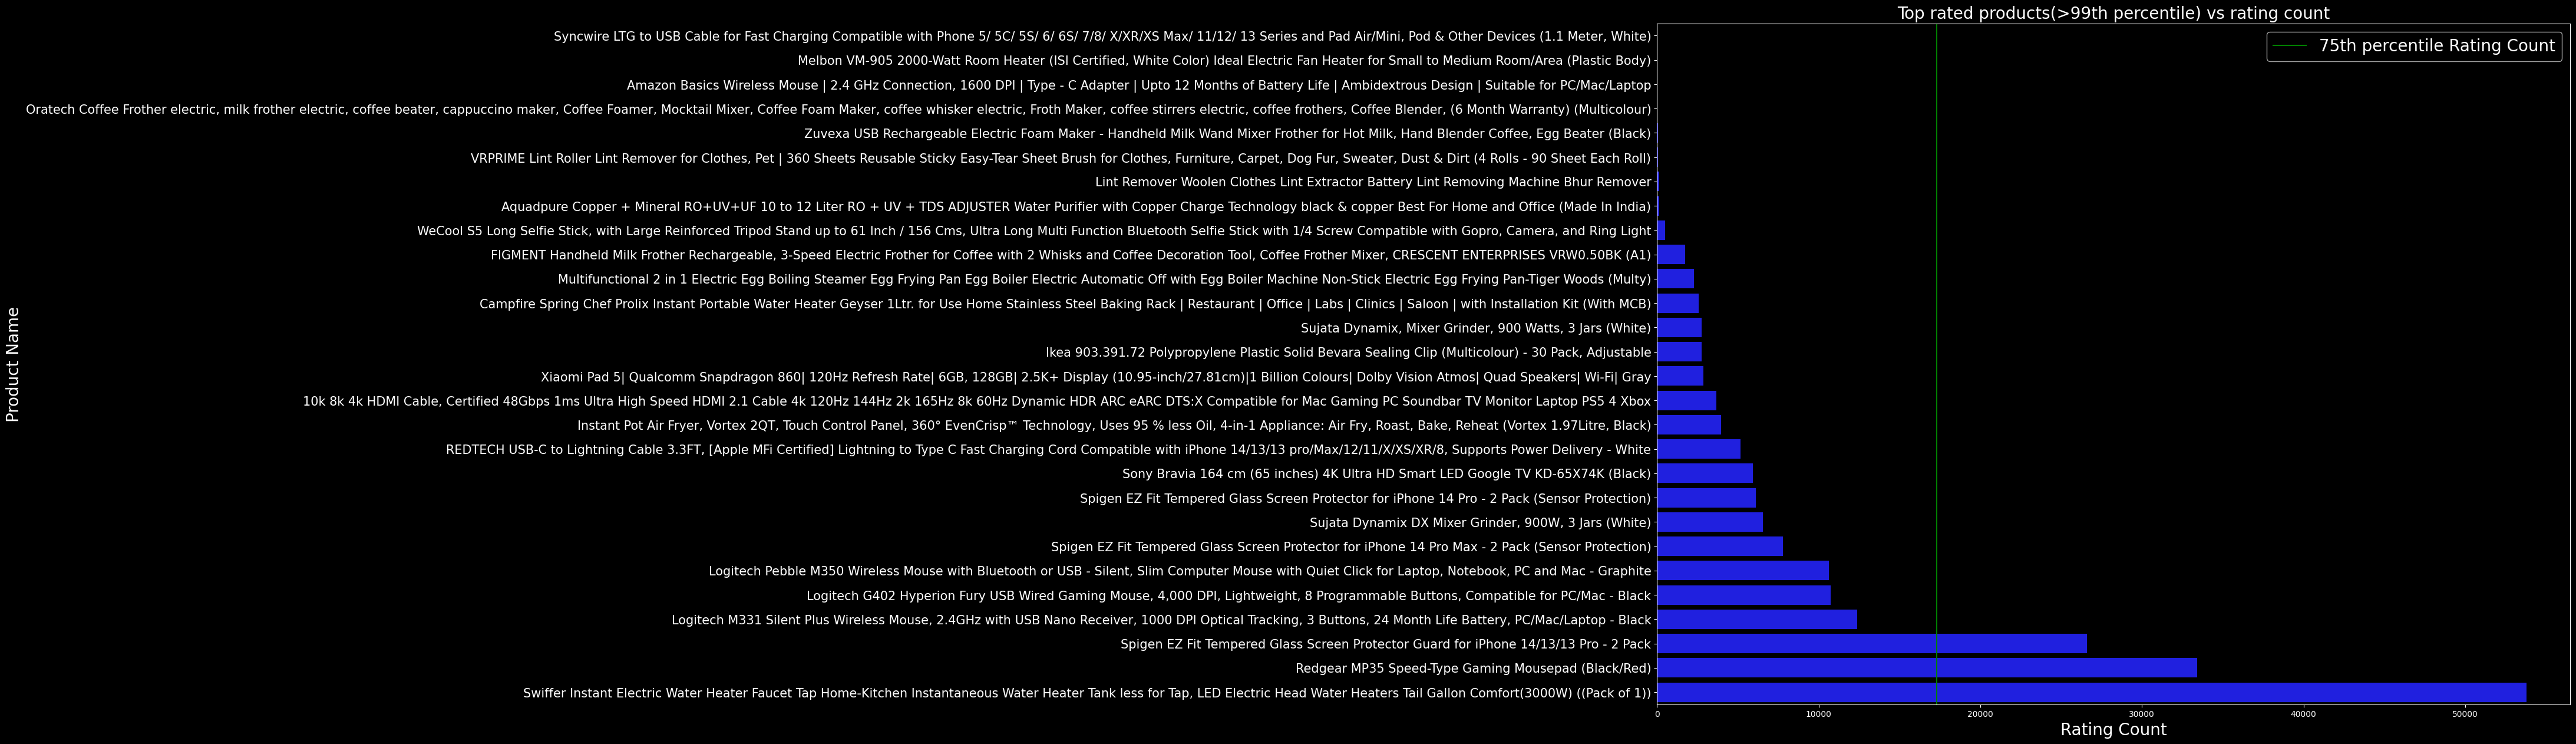

75th percentile threshold for Rating counts: 17325.0


In [21]:
highlyRatedProducts = df[df['rating'] > np.percentile(df['rating'] , 95)]
tdf = highlyRatedProducts[['product_name' , 'frating_count']]
tdf = tdf.groupby('product_name').agg({"frating_count":np.sum}).reset_index().sort_values('frating_count')
# review count 75th percentile
rc75 = np.percentile(df['frating_count'] , 75)
plt.figure(figsize = (20,15))
sns.barplot(tdf , x = 'frating_count' , y = 'product_name')
plt.axvline(rc75 , color = 'green' , label = "75th percentile Rating Count")
plt.legend(fontsize = 20)
plt.title('Top rated products(>99th percentile) vs rating count' , fontsize = 20)
plt.xlabel('Rating Count' , fontsize = 20)
plt.ylabel('Product Name' , fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()
print(f"75th percentile threshold for Rating counts: {np.percentile(df['frating_count'] , 75)}")

### Create 3 actionable insights for Amazon’s product strategy based on EDA.


## Content based filtering:


### Vectorize product text:


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(stop_words="english" , max_features = 1000)
uniqueProducts = df['product_name'].unique()
uniques = df.groupby('product_name').agg({'about_product': np.min}).reset_index()
# df.set_index('product_name').loc[uniqueProducts]
data = uniques.product_name + "pdesc:" + uniques.about_product

tmat = vectorizer.fit_transform(data)
cmat = cosine_similarity(tmat)
cmat = pd.DataFrame(cmat , index = uniques.product_name , columns = uniques.product_name)
cmat.head()

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_49663/2437160530.py:6: FutureWarning: The provided callable <function min at 0x107206980> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  uniques = df.groupby('product_name').agg({'about_product': np.min}).reset_index()


product_name,!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor","10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox","3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing","3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)","4 in 1 Handheld Electric Vegetable Cutter Set,Wireless Food Processor Electric Food Chopper for Garlic Chili Pepper Onion Ginger Celery Meat with Brush",7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,7SEVEN® Bluetooth Voice Command Remote for Xiaomi Redmi Mi Smart TV with Netflix & Prime Video Hot Keys XMRM-00A,7SEVEN® Compatible Lg Smart Tv Remote Suitable for Any LG LED OLED LCD UHD Plasma Android Television and AKB75095303 replacement of Original Lg Tv Remote Control,...,"pTron Solero T351 3.5Amps Fast Charging Type-C to Type-C PD Data & Charging USB Cable, Made in India, 480Mbps Data Sync, Durable 1 Meter Long Cable for Type-C Smartphones, Tablets & Laptops (Black)","pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)","pTron Volta Dual Port 12W Smart USB Charger Adapter, Multi-Layer Protection, Made in India, BIS Certified, Fast Charging Power Adaptor Without Cable for All iOS & Android Devices (Black)","realme 10W Fast Charging Micro-USB Cable (Braided, Black)",realme Buds Classic Wired in Ear Earphones with Mic (Black),"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)","realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display","realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display","rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver","tizum HDMI to VGA Adapter Cable 1080P for Projector, Computer, Laptop, TV, Projectors & TV"
product_name,,,,,,,,,,,,,,,,,,,,,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,1.000000,0.651766,0.000000,0.000000,0.000000,0.005335,0.015695,0.016846,0.006940,0.012006,...,0.011081,0.010517,0.051008,0.002216,0.034608,0.002597,0.000000,0.000000,0.042540,0.011520
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,0.651766,1.000000,0.003959,0.000000,0.000000,0.005383,0.077242,0.000000,0.014262,0.000000,...,0.015025,0.014261,0.056254,0.002236,0.028344,0.007901,0.000000,0.000000,0.009615,0.007491
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",0.000000,0.003959,1.000000,0.004293,0.013638,0.000000,0.043882,0.027753,0.040204,0.006106,...,0.018168,0.023845,0.059857,0.031361,0.036647,0.027823,0.026934,0.013725,0.049793,0.023233
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",0.00

In [23]:
def recommend_products(productname , similarity_matrix , n = 5):
    results = similarity_matrix[productname].sort_values(ascending = False)
    # print(f"{results=}")
    return results.iloc[1:n + 1]
product = uniques['product_name'].iloc[5]
print(f"{product=}")
recommend_products(uniques['product_name'].iloc[5] , cmat)

product='3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)'


product_name
Monitor AC Stand/Heavy Duty Air Conditioner Outdoor Unit Mounting Bracket                                                                                                                                  0.351010
ELV Car Mount Adjustable Car Phone Holder Universal Long Arm, Windshield for Smartphones - Black                                                                                                           0.246352
Prestige PWG 07 Wet Grinder, 2L (Multicolor) with Coconut Scraper and Atta Kneader Attachments, 200 Watt                                                                                                   0.221670
Wipro Vesta 1200 Watt GD203 Heavyweight Automatic Dry Iron| Quick Heat Up| Anti bacterial German Weilburger Double Coated Black Soleplate |2 Years Warranty                                                0.193061
Caprigo Heavy Duty TV Wall Mount Stand for 12 to 27 inches LED/LCD/Monitor Screen's, Full Motion Rotatable Universal TV & Monitor Wall Moun

In [24]:
lowps = df[df['rating'] < 3]['product_name']
lowps

545     SHREENOVA ID116 Plus Bluetooth Fitness Smart W...
1243    Personal Size Blender, Portable Blender, Batte...
1286    MR. BRAND Portable USB Juicer Electric USB Jui...
1309    Khaitan ORFin Fan heater for Home and kitchen-...
1356    Green Tales Heat Seal Mini Food Sealer-Impulse...
1449    IONIX Tap filter Multilayer | Activated Carbon...
Name: product_name, dtype: object

In [25]:
for i , product in enumerate(lowps):
    print(f"{i=}, {product} \n" + "-"*20 +  f"similar products: {recommend_products(product , cmat)}")
    print("*"* 1000 , "\n\n")

i=0, SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black) 
--------------------similar products: product_name
10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor                                         0.905103
PTron Newly Launched Force X10 Bluetooth Calling Smartwatch with 1.7" Full Touch Color Display, Real Heart Rate Monitor, SpO2, Watch Faces, 5 Days Runtime, Fitness Trackers & IP68 Waterproof (Blue)      0.448468
PTron Newly Launched Force X10 Bluetooth Calling Smartwatch with 1.7" Full Touch Display, Real Heart Rate Monitor, SpO2, Watch Faces, 5 Days Runtime, Health/Fitness Trackers & IP68 Waterproof (Black)    0.428653
PTron Newly Launched Force X10 Bluetooth Calling Smartwatch with 1.7" Full Touch Color Display, Real Heart Rate Monitor, SpO2, Watch Faces, 5 Days Runtime, Fitness Trackers & IP68 Waterproof (Pink)      0.425

In [26]:
x = df['product_name'].iloc[86]
print(f"Searched product: {x}")
recommend_products(x , cmat)

Searched product: Acer 127 cm (50 inches) I Series 4K Ultra HD Android Smart LED TV AR50AR2851UDFL (Black)


product_name
Acer 139 cm (55 inches) I Series 4K Ultra HD Android Smart LED TV AR55AR2851UDFL (Black)     0.993377
Acer 109 cm (43 inches) I Series 4K Ultra HD Android Smart LED TV AR43AR2851UDFL (Black)     0.993315
Acer 80 cm (32 inches) I Series HD Ready Android Smart LED TV AR32AR2841HDFL (Black)         0.912470
Acer 100 cm (40 inches) P Series Full HD Android Smart LED TV AR40AR2841FDFL (Black)         0.856360
Acer 139 cm (55 inches) H Series 4K Ultra HD Android Smart LED TV AR55AR2851UDPRO (Black)    0.851564
Name: Acer 127 cm (50 inches) I Series 4K Ultra HD Android Smart LED TV AR50AR2851UDFL (Black), dtype: float64

### Evaluate Recommendations:

---


## Collaborative Filtering:

---


In [27]:
# create the uid , pid , rating dataframe to feed to the model
# basically get the data to user, product, rating format

temp = [(user  , row['product_id'], row['rating'])for _ , row in df.iterrows() for user in row['user_id'].split(",")]
upr = pd.DataFrame(temp , columns = ['user' , 'product' , 'rating'])
upr = upr.drop_duplicates()
upr

,user,product,rating
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,4.2
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,B07JW9H4J1,4.2
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,B07JW9H4J1,4.2
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,B07JW9H4J1,4.2
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,B07JW9H4J1,4.2
...,...,...,...
11498,AHXCDNSXAESERITAFELQABFVNLCA,B01486F4G6,4.3
11499,AGRZD6CHLCUNOLMMIMIHUCG7PIFA,B01486F4G6,4.3
11500,AFQZVGSOSOJHKFQQMCEI4725QEKQ,B01486F4G6,4.3
11501,AEALVGXXIP46OZVXKRUXSDWZJMEA,B01486F4G6,4.3


In [28]:
from lightfm import LightFM
from lightfm.data import Dataset

dataset = Dataset()
users = upr['user'].unique()
items = upr['product'].unique()
dataset.fit(users , items)

# build interactions

interactions , weights = dataset.build_interactions([(row['user'] , row['product'] , float(row['rating'])) for _ , row in upr.iterrows()])
print(f"Unique interaction weights: {np.unique(weights.tocoo().data)}")

/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


Unique interaction weights: [2.  2.3 2.6 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2
 4.3 4.4 4.5 4.6 4.7 4.8 5. ]


In [29]:
#build interactions and weights dataframes to plot interactions:
# 1. convert to co-ordinate format for easy indexing of data

interactions = interactions.tocoo()
weights = weights.tocoo()

interactionsdf = pd.DataFrame({
    'user':interactions.row,
    "product": interactions.col,
    "interaction":interactions.data
})
weightsdf = pd.DataFrame({
    'user':weights.row,
    "product": weights.col,
    "weight":weights.data
})

In [30]:
interactionsdf.head()

,user,product,interaction
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1


In [31]:
weightsdf.head()

,user,product,weight
0,0,0,4.2
1,1,0,4.2
2,2,0,4.2
3,3,0,4.2
4,4,0,4.2


In [32]:
#visualize interactions:
vdf = interactionsdf.merge(weightsdf , on = ['user' , 'product'])
vdf = vdf.sort_values(by = ['user' , 'product']).reset_index(drop = True)
vdf.head(20)

,user,product,interaction,weight
0,0,0,1,4.2
1,0,42,1,4.2
2,0,80,1,4.2
3,0,89,1,4.2
4,0,106,1,4.2
5,0,220,1,4.2
6,1,0,1,4.2
7,1,42,1,4.2
8,1,80,1,4.2
9,1,89,1,4.2


In [33]:
#convert to csr format for easy slicing:
interactions_csr = interactions.tocsr()
weights_csr = weights.tocsr()
slicesize = 10

islice = interactions_csr[:slicesize , :slicesize].toarray()
wslice = weights_csr[:slicesize , :slicesize].toarray()
print(f"{islice=} , \n{wslice=}")

islice=array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int32) , 
wslice=array([[4.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [4.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [4.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [4.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [4.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [4.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [4.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [4.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. ],
       [0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 

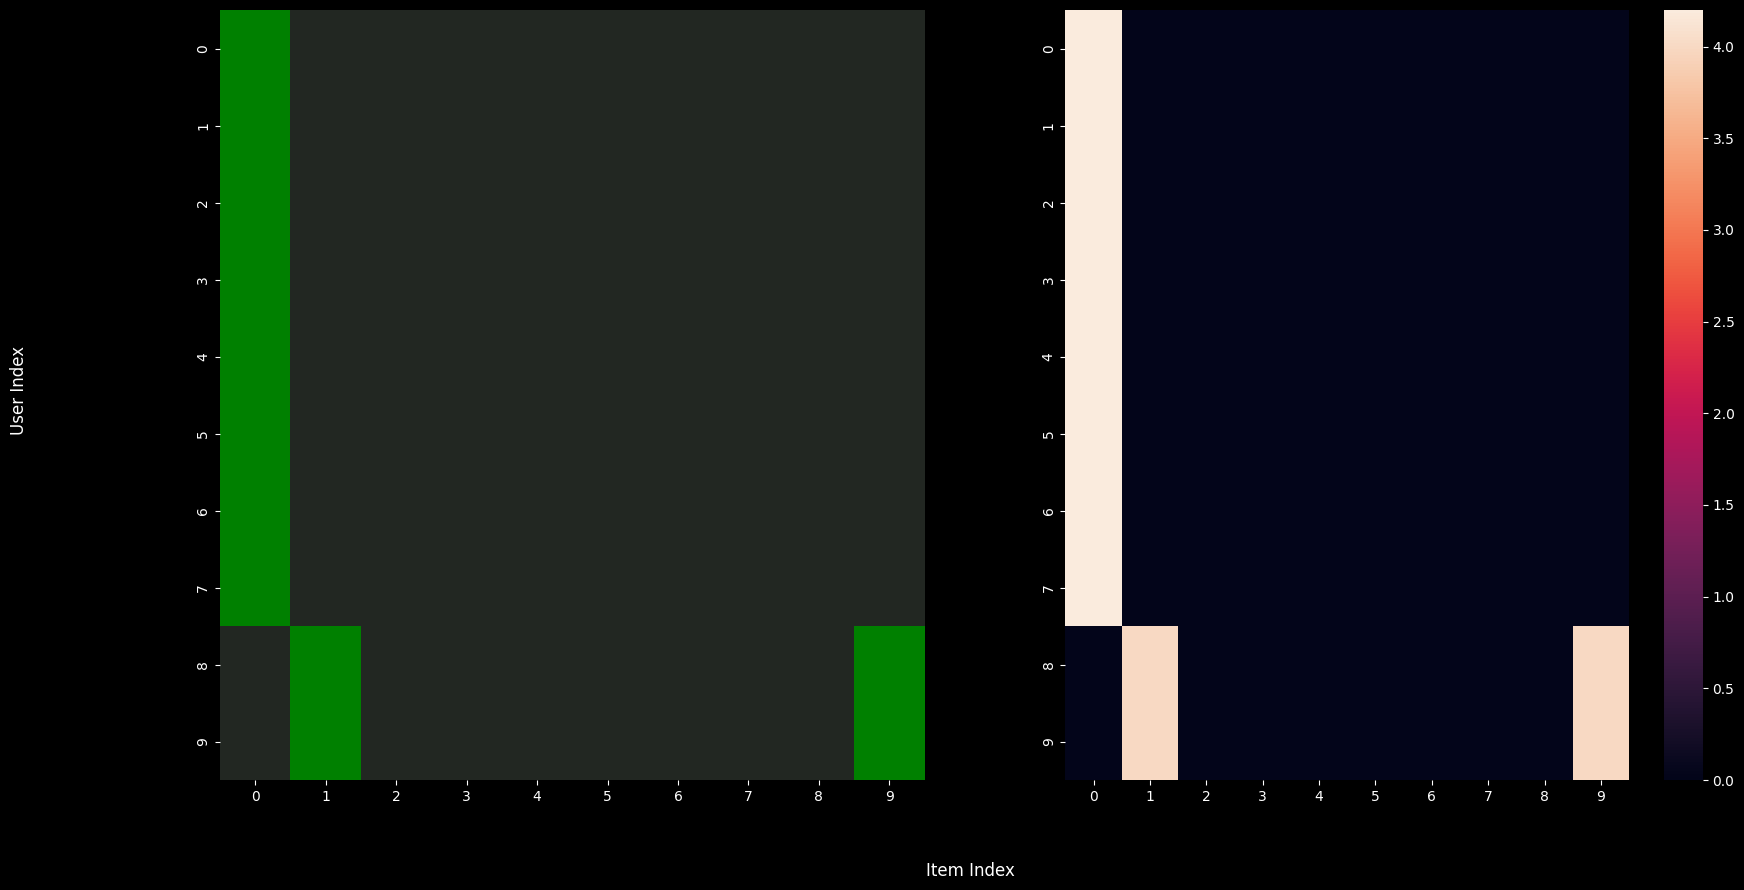

In [34]:
#visualize the islice and wslice:
fig = plt.figure(figsize = (20,10))


plt.subplot(1 , 2, 1)
sns.heatmap(islice , cmap = sns.dark_palette('green' , as_cmap=True) , cbar = False)

plt.subplot(1 , 2, 2)
sns.heatmap(wslice)

fig.supxlabel("Item Index", fontsize=12)
fig.supylabel("User Index", fontsize=12)
plt.show()

In [35]:
# 1.initialize and train model:

model = LightFM(no_components=32, loss='warp', random_state=42)

# 2. Train the model
model.fit(interactions , weights , epochs = 20 , num_threads = 2)
print("Model trained!")

Model trained!


In [36]:
def recommend_products_collaborative(model , dataset , userid , df , n = 5):

    umap , _ , imap , _ = dataset.mapping()

    scores = model.predict(umap[userid] , np.arange(len(imap)))

    # get indices top scores:
    topi = np.argsort(-scores)[:n]

    # get real product ids from internal topis:
    ipmap = {val : key for key , val in imap.items()}

    rids = [ipmap[id] for id in topi]

    # get products present in rids
    rdf = df[df['product_id'].isin(rids)]

    #get the movies in the correct order of their respective scores:
    rdf = rdf.set_index('product_id').loc[rids].reset_index()
    return rdf[['product_name' , 'about_product']]

iuser = users[4]
print(f"Input user: {iuser}")
recommend_products_collaborative(model , dataset , iuser , df)

Input user: AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q


,product_name,about_product
0,Gizga Essentials Laptop Bag Sleeve Case Cover ...,Innovative Design: This Laptop Case is made of...
1,"Oratech Coffee Frother electric, milk frother ...",-Make delicious milk foam creamer for your dri...
2,boAt Bassheads 242 in Ear Wired Earphones with...,Fly into your workouts with precise tones that...
3,Wolpin 1 Lint Roller with 60 Sheets Remove Clo...,Strong Adhesion: Wolpin lint roller is a very ...
4,Lapster 1.5 mtr USB 2.0 Type A Male to USB A M...,Plug & Play|Stable & Reliable Connectivity.|Sp...
5,Lapster 1.5 mtr USB 2.0 Type A Male to USB A M...,Plug & Play|Stable & Reliable Connectivity.|Sp...


In [37]:
#recommend top 5 unseen product per user:

## Item - Item based collaborative recommendations:


In [136]:
from sklearn.metrics.pairwise import cosine_similarity

# build similarity matrix

cmat = cosine_similarity(model.item_embeddings)
cmat = pd.DataFrame(cmat)
cmat.head()

,0,1,2,3,4,5,6,7,8,9,...,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
0,1.000000,-0.050963,-0.186884,0.796893,0.262990,-0.050994,0.033823,-0.733675,-0.576365,0.155602,...,0.219185,-0.167493,0.308785,0.184858,0.042032,0.564466,0.306124,-0.137108,-0.119894,0.016535
1,-0.050963,1.000000,-0.160403,-0.064226,0.029889,0.100174,-0.339070,-0.043716,0.009111,0.809568,...,0.103616,0.189315,-0.243850,-0.012794,0.463725,-0.152066,0.060828,0.192531,0.066565,0.017743
2,-0.186884,-0.160403,1.000000,-0.070914,-0.214418,-0.336395,0.181328,0.316436,0.286786,-0.096431,...,0.135200,-0.004232,-0.146146,-0.126993,-0.202913,-0.366461,-0.619278,-0.069948,0.108993,-0.043971
3,0.796893,-0.064226,-0.070914,1.000000,0.144162,-0.100995,0.092864,-0.555569,-0.426916,0.143278,...,0.239397,-0.266894,0.200194,0.049979,0.059673,0.416135,0.127266,-0.138171,-0.099033,-0.012661
4,0.262990,0.029889,-0.214418,0.144162,1.000000,0.229422,-0.415596,-0.273971,-0.043773,-0.044515,...,0.121642,-0.119598,0.352876,0.363351,0.100772,0.227199,0.260114,0.030227,-0.261124,0.188558


In [185]:
def recommendItems(itemid , dataset , cmat , df, n = 5):
    itemname = df.set_index('product_id').loc[itemid , 'product_name']
    if type(itemname) != str:
        itemname = itemname.unique()[0]
    print(f"Input Product: {itemname}")
    imap = dataset.mapping()[2]
    rmap = {val : key for key , val in imap.items()}
    # print(imap[itemid])
    # print(rmap[imap[itemid]])
    # get top related items

    scores = pd.Series(cmat[imap[itemid]])
    # print(scores)
    tids = np.argsort(-scores)[1:n+1]
    # print(f"{tids.tolist()}")
    tscores = scores[scores.index.isin(tids)]
    tscores = tscores.loc[tids]
    # print([id for id , score in enumerate(scores) if id in tids.tolist()])
    # print(f"{tscores}")
    tids = [rmap[id] for id in tids]

    # print(f"{tids}")
    ritems = df[df['product_id'].isin(tids)]
    ritems = ritems.set_index('product_id').loc[tids].reset_index()

    return [(pname , score) for pname ,score in zip(ritems['product_name'] , tscores)]

recommendItems(items[40] , dataset , cmat , df)

Input Product: AmazonBasics USB 2.0 Cable - A-Male to B-Male - for Personal Computer, Printer- 6 Feet (1.8 Meters), Black


[('Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)',
  0.9286128282546997),
 ('Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)',
  0.9242603778839111),
 ('Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)',
  0.9200677275657654),
 ('iBELL SM1515NEW Sandwich Maker with Floating Hinges, 1000Watt, Panini / Grill / Toast (Black)',
  0.9129012227058411),
 ('Wayona Nylon Braided 2M / 6Ft Fast Charge Usb To Lightning Data Sync And Charging Cable For Iphone, Ipad Tablet (6 Ft Pack Of 1, Grey)',
  0.9107538461685181)]

### 5 unseen products per user:


## Hybrid Recommendation Engine:


Given an item recommend items similar to it using both content based and collaborative based recommendation methods.


In [ ]:
def hybridrec(itemid , dataset , model , cmat1 , df , n = 5):
    itemname = df.set_index('product_id').loc[itemid , 'product_name']
    if type(itemname) != str:
        itemname = itemname.unique()[0]
    print(f"Input Product: {itemname}")
    imap = dataset.mapping()[2]
    rimap = {val : key for key , val in imap.items()}

    cmat2 = model.item_embeddings

    s1 = cmat1[imap[itemid]]
    s2 = cmat2[imap[itemid]]

    top1 = np.argsort(-s1)[1:n+1]
    top2 = np.argsort(-s2)[1:n+1]

    i1 = df[df['product_id'].isin(top1)]
    i2 = df[df['product_id'].isin(top2)]

    i1 = i1.set_index('product_id').loc[top1].reset_index()
    i2 = i2.set_index('product_id').loc[top2].reset_index()
    return i1 , i2

hybridrec(items[4] , )
